<a id='Title-Basic-NLP-RNN'></a>
<h1 style="color:SlateGray;">Basic NLP RNN</h1>

**Input dataset**

IMBD: a set of movie reviews with an adjustable limit on max word count.

**Output classification**

Binary categorization (positive/negative) of a movie review.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](01_Image_Classification.ipynb#Layers-Dense)

[*Embedding*](11_Word_Embeddings.ipynb#Layers-Embedding)

<a id='Layers-SimpleRNN'></a>
*SimpleRNN*

This layer applies only the key features of RNNs, which are the state and feedback loop. This allows the network to store something analogous to human short-term memory.

Holds an internal state variable that is modified by each iteration ($t$)'s output and is then consequently used for computation along with the following iteration ($t+1$)'s input.

<a id='Layers-LSTM'></a>
*LSTM*

Builds upon the [SimpleRNN](#Layers-SimpleRNN) layer including a running history of all outputs to be used in combination with the state variable. This allows the network to reference old states analogous to writing notes and referencing them when they've fallen from short-term memory.

A running history list is kept external to the network and its values are used as input along with the network's most recent output to compute the next state. This allows vanishingly small gradients to refresh and continue updating weights, thus allowing learning to continue.

**Activations**

[*sigmoid*](02_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](01_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](02_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

First look into Recurrent Neural Networks in an application where sequences or time-series are not present in the data, thus, the accuracies may not be any more impressive than those of a purely [Dense network](02_Binary_Classification.ipynb#Title-Binary-Classification).

The first set of models are built upon a [SimpleRNN](#Layers-SimpleRNN) and [LSTM](#Layers-LSTM) layer, respectively, training on a limited 500 words per review. This was done to contrast against training with 5000 words and observing the effects of the vanishing gradient problem on the SimpleRNN model. Since this layer lacks mitigation against this particular problem, the accuracy is expected to worsen as the word counts increase.


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6463 - acc: 0.6092 - val_loss: 0.5223 - val_acc: 0.7612
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.4235 - acc: 0.8163 - val_loss: 0.3826 - val_acc: 0.8450
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2986 - acc: 0.8795 - val_loss: 0.3368 - val_acc: 0.8652
Epoch 4/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.2255 - acc: 0.9134 - val_loss: 0.3564 - val_acc: 0.8682
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1690 - acc: 0.9357 - val_loss: 0.4190 - val_acc: 0.8574
Epoch 6/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1194 - acc: 0.9591 - val_loss: 0.4573 - val_acc: 0.8470
Epoch 7/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.0756 - acc: 0.9753 - val_loss: 0.4317 - val_acc:

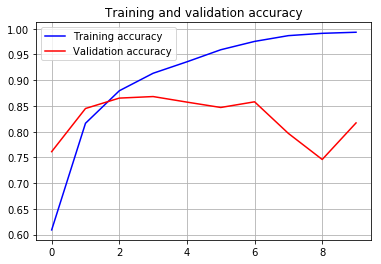

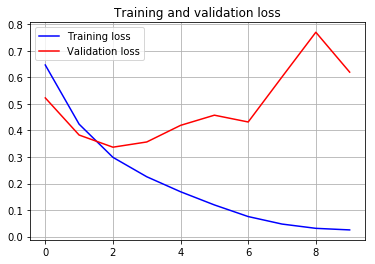

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [6]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 30s 1ms/step


[0.6524494341516495, 0.80836]

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.5099 - acc: 0.7622 - val_loss: 0.3932 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2892 - acc: 0.8871 - val_loss: 0.3494 - val_acc: 0.8492
Epoch 3/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.2297 - acc: 0.9118 - val_loss: 0.2997 - val_acc: 0.8874
Epoch 4/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.1934 - acc: 0.9287 - val_loss: 0.4471 - val_acc: 0.8584
Epoch 5/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.1742 - acc: 0.9364 - val_loss: 0.3014 - val_acc: 0.8774
Epoch 6/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.1520 - acc: 0.9446 - val_loss: 0.3852 - val_acc: 0.8724
Epoch 7/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1430 - acc: 0.9492 - val_loss: 0.3527 - v

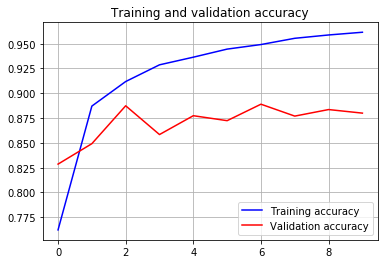

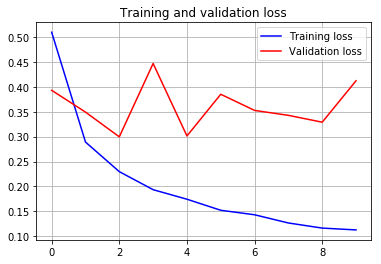

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [9]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 139s 6ms/step


[0.5053629111945629, 0.85376]

In [19]:
maxlen = 5000

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 304s 15ms/step - loss: 0.6451 - acc: 0.6091 - val_loss: 0.5697 - val_acc: 0.7102
Epoch 2/10
20000/20000 [==============================] - 293s 15ms/step - loss: 0.4234 - acc: 0.8226 - val_loss: 0.4994 - val_acc: 0.7744
Epoch 3/10
20000/20000 [==============================] - 287s 14ms/step - loss: 0.3031 - acc: 0.8788 - val_loss: 0.4114 - val_acc: 0.8188
Epoch 4/10
20000/20000 [==============================] - 295s 15ms/step - loss: 0.2275 - acc: 0.9124 - val_loss: 0.3842 - val_acc: 0.8468
Epoch 5/10
20000/20000 [==============================] - 289s 14ms/step - loss: 0.1703 - acc: 0.9366 - val_loss: 0.3595 - val_acc: 0.8744
Epoch 6/10
20000/20000 [==============================] - 275s 14ms/step - loss: 0.1151 - acc: 0.9607 - val_loss: 0.4268 - val_acc: 0.8356
Epoch 7/10
20000/20000 [==============================] - 284s 14ms/step - loss: 0.0773 - acc: 0.9755 - val_loss: 0.4

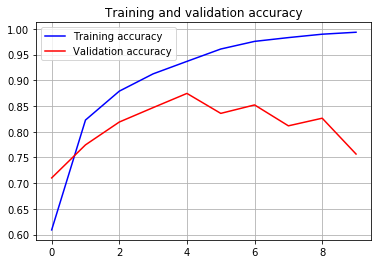

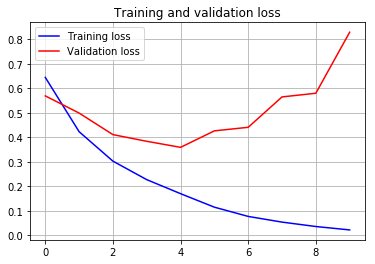

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [22]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 272s 11ms/step


[0.818098555355072, 0.75792]

In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1289s 64ms/step - loss: 0.5174 - acc: 0.7612 - val_loss: 0.3471 - val_acc: 0.8700
Epoch 2/10
20000/20000 [==============================] - 1258s 63ms/step - loss: 0.2989 - acc: 0.8853 - val_loss: 0.3093 - val_acc: 0.8666
Epoch 3/10
20000/20000 [==============================] - 1231s 62ms/step - loss: 0.2334 - acc: 0.9114 - val_loss: 0.3487 - val_acc: 0.8748
Epoch 4/10
20000/20000 [==============================] - 1210s 61ms/step - loss: 0.1977 - acc: 0.9263 - val_loss: 0.3015 - val_acc: 0.8852
Epoch 5/10
20000/20000 [==============================] - 1267s 63ms/step - loss: 0.1722 - acc: 0.9378 - val_loss: 0.2894 - val_acc: 0.8852
Epoch 6/10
20000/20000 [==============================] - 1245s 62ms/step - loss: 0.1556 - acc: 0.9432 - val_loss: 0.3200 - val_acc: 0.8814
Epoch 7/10
20000/20000 [==============================] - 1212s 61ms/step - loss: 0.1436 - acc: 0.9489 - val_lo

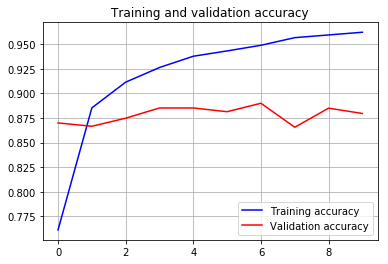

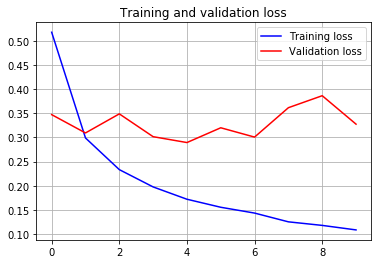

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [25]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 12803s 512ms/step


[0.37016095649242403, 0.86204]